# ÖDEV-4 
## Ad Soyad : Muhammed Cemal Eryiğit
### Öğrenci No : 1801022024 

### Ön hazırlık dosyasında verilen kodlar aşağıya yazılacak:

### OnCalismaOrnek7

In [1]:
import numpy as np # Bütün kütüphane tanımlamaları burada yapıldı
import matplotlib.pyplot as plt
import scipy.signal as sgnl
import zplane

In [2]:
z = np.array([0]) # a zero @z=0
p = np.array([1.0/4, 1.0/2]) # poles of the system
b, a = sgnl.zpk2tf(z, p, 1) # since there is no gain k=1
print(a)
print(b)
#a = sgnl.convolve(np.array([1, -1/4]),np.array([1, -1/2]))

[ 1.    -0.75   0.125]
[1. 0.]


In [3]:
r, p, k = sgnl.residuez(b,a) 
poless = np.roots(a)
print(r)
print(p)
print(k)

[-1.  2.]
[0.25 0.5 ]
[]


### OnCalismaOrnek8

(array([[1.        ],
       [0.75      ],
       [0.4375    ],
       [0.234375  ],
       [0.12109375],
       [0.06152344],
       [0.03100586],
       [0.01556396],
       [0.00779724],
       [0.00390244]]),)


<StemContainer object of 3 artists>

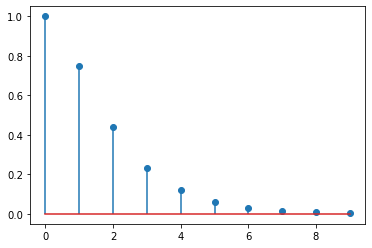

In [4]:
num = np.array([1,0,0]) 
denum = np.array([1, -3.0/4, 1.0/8]) 
n, x = sgnl.dimpulse((num, denum, 1),x0=0, n=10)
print(x)
plt.stem(n,np.squeeze(x))

### OnCalismaOrnek9

Text(0.5, 0, 'index vector (sample)')

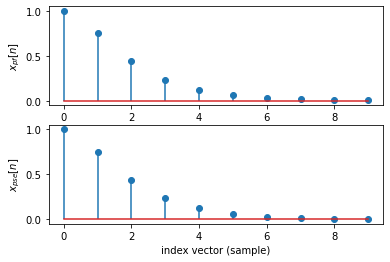

In [5]:
n = np.arange(0,10,1) 
xpf = -(1.0/4)**n + 2*(1.0/2)**n 
num = np.array([1, 0, 0]) 
denum = np.array([1, -3.0/4, 1.0/8]) 
n1, xpse = sgnl.dimpulse((num, denum, 1),x0=0, n=10)
xpse = np.squeeze(xpse)


plt.subplot(2,1,1), plt.stem(n, xpf), plt.ylabel('$x_{pf}[n]$')
plt.subplot(2,1,2), plt.stem(n, xpse), plt.ylabel('$x_{pse}[n]$')
plt.xlabel('index vector (sample)')

### OnCalismaOrnek10

<StemContainer object of 3 artists>

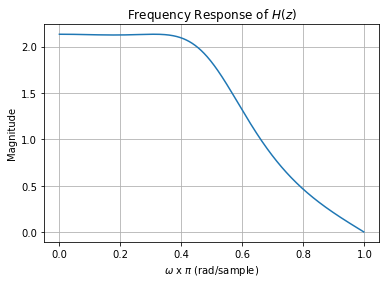

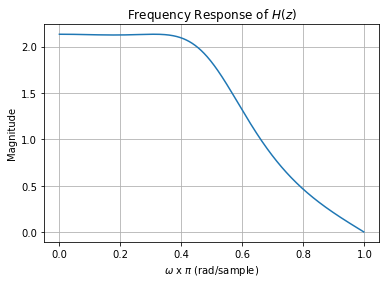

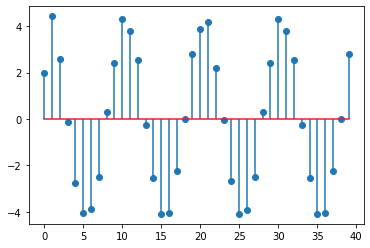

In [6]:
zeros = np.array([-1]) 
poles = np.array([1j/2, -1j/2, 1.0/4])
w, H = sgnl.freqz_zpk(zeros, poles, 1)
plt.plot(w/np.pi, abs(H)) 
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude'), plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()


num, denum = sgnl.zpk2tf(zeros, poles, 1) 
w1, H_tf = sgnl.freqz(num, denum)
plt.figure()
plt.plot(w1/np.pi, abs(H_tf)) 
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude'), plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()

n = np.arange(0, 40, 1)
xn = 2*np.cos(0.2*np.pi*n) + np.sin(0.9*np.pi*n)
yn = sgnl.lfilter(num, denum, xn)
plt.figure()
plt.stem(n, yn)

### OnCalismaOrnek11

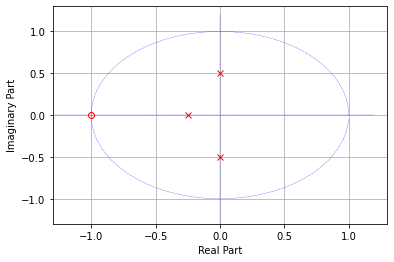

In [7]:
zeross = np.array([-1]) 
poless = np.array([-1j/2, 1j/2, -1/4]) 
k = 1 
b, a = sgnl.zpk2tf(zeross,poless,k) 
zplane.zplane(b,a) 

<Figure size 432x288 with 0 Axes>

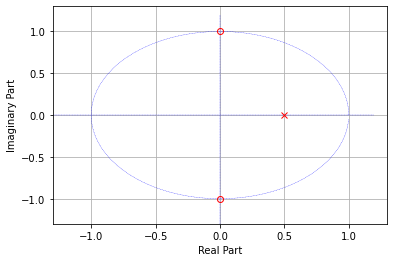

In [8]:
num = np.array([1, 0, 1]) 
denum = np.array([1, -1.0/2])
plt.figure()
zplane.zplane(num, denum)

Text(0.5, 0, '$\\omega$ x$\\pi$ rad/sample')

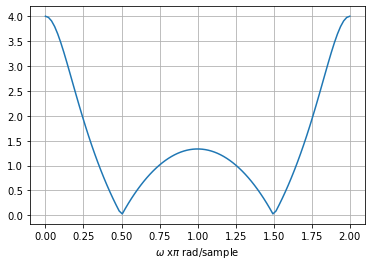

In [9]:
w = np.linspace(0, 2*np.pi, 100)
Hw = (1+np.exp(-2*1j*w))/(1-(1/2)*np.exp(-1j*w))
# alternatively, we could use the sgnl.freqz_zpk() function to calculate the Frequen
# or sgnl.freqz() function to calculate from the coefficients.
Hw_abs = abs(Hw)
plt.figure()
plt.plot(w/np.pi, Hw_abs)
plt.grid()
plt.xlabel('$\omega$ x$\pi$ rad/sample')

# Ön hazırlık ödevleri (ÖDEV-4 başlığı altındaki soruların çözümleri aşağıda verilecek) 

### SORU-1

### a)

$ y[n] = \frac{1}{2} y[n-1] - 4y[n-2] + 2 y[n-3] + x[n] + \frac{2}{3} x[n-1] + \frac{1}{9} x[n-2] $

### Sistem Fonksiyonu $ H(z) = \frac{Y(z)}{X(z)} $

$ Y(z) = \frac{1}{2} Y(z)z^{-1}-4Y(z)z^{-2}+2 Y(z)z^{-3}+X(z)+\frac{2}{3}X(z)z^{-1}+\frac{1}{9} X(z)z^{-2} $

$ Y(z)-\frac{1}{2}Y(z)z^{-1}+ 4Y(z)z^{-2}-2 Y(z)z^{-3} = X(z)+\frac{2}{3} X(z)z^{-1}+\frac{1}{9}X(z)z^{-2}$

$Y(z)[1-\frac{1}{2}z^{-1}+4z^{-2}-2z^{-3}] = X(z)[1 +\frac{2}{3} z^{-1} +\frac{1}{9}z^{-2} ]$

$ \frac{Y(z)}{X(z)}=H(z)= \frac{1 + \frac{2}{3} z^{-1}+\frac{1}{9} z^{-2}} {1 - \frac{1}{2}z^{-1}+4z^{-2}-2z^{-3}}$

### b)

<Figure size 432x288 with 0 Axes>

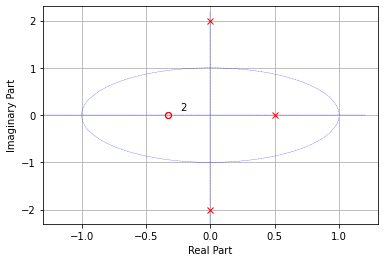

In [10]:
num = np.array([1,2/3,1/9])  # sistem fonksiyonunda z^n pay katsayıları  
denum = np.array([1,-1/2,4,-2]) #sistem fonksiyonunda z^n payda katsayıları 
plt.figure()
zplane.zplane(num, denum)

### c)

#### 1)

### Sistemin nedensellik şartı $ h[n]= 0,n < 0 $
### Sistem nedensel olduğu için sağ yanlıdır.
### ROC bölgesinde kutup olmadığından Roc için şu eşitliği yazarız. 
### ROC $|z| > 2 $

#### 2)

###  Sistemin fourier dönüşümü varsa  z-düzleminde  |z|  birim çemberin içindedir. 
### Z-transformu olan sistem için ROC bölgesinde kutuptan bahsedemeyiz. 
### Roc için şu eşitliği yazabiliriz. 
### ROC $0.5 < |z| < 2$

### d)

Text(0, 0.5, 'h[n]')

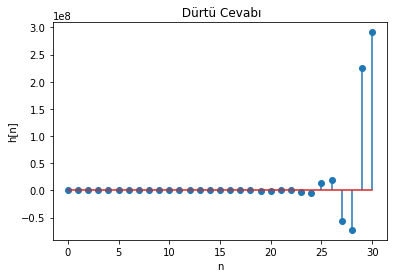

In [11]:
num = np.array([1, 2/3, 1/9]) # sistem fonksiyonunda z^n pay katsayıları  
denum = np.array([1, -1/2, 4, -2]) #sistem fonksiyonunda z^n payda katsayıları 
n, x = sgnl.dimpulse((num, denum, 1),x0=0, n=31)
plt.stem(n, np.squeeze(x) )
plt.title(' Dürtü Cevabı')
plt.xlabel('n')
plt.ylabel('h[n]')

### Kararlılık şartı dürtü cevbının mutlak toplamlarının sonlu bir sayıya eşit olmasıdır. $\sum_{n=-\infty}^\infty |h[n]| < \infty $ 
### Sorudaki dürtü cevabı toplamı sonlu bir sayıya yakınsamaz toplam sonsuza ıraksar. 
### Bu sebeple sistem kararsızdır.

### e)


### Sistemin nedensellik şartı $ h[n]= 0,n < 0 $
### Sistem nedensel olması için sağ yanlı olması gerekir.
### Kararlılık şartı dürtü cevbının mutlak toplamlarının sonlu bir sayıya eşit olmasıdır. $\sum_{n=-\infty}^\infty |h[n]| < \infty $ 
### Sistemin hem nedensel hem kararlı olabilmesi için z = 2j ve z = -2j köklerinin olmaması gerekir. 
### Bu durumda ROC$ |z| > 0.5 $ eşitliği ile belirlenir.
### Sistem şuan hem sağ yanlı hem de birim çemberi kapsayan ROC'a sahiptir. 
### H(z')'yi şu şekilde yazdığımızda köklerden kurtulmuş ve istenilen sonucu elde etmiş oluruz.
### $ H(z') = H(z)*(z + 2j)*(z - 2j) = (z^2 + 4)*H(z)$ 
### $ H(z') =\frac{(z^2 +4)+(z^2 + 4)\frac{2}{3} z^{-1} + (z^2 + 4)\frac{1}{9} z^{-2}} {1 - \frac{1}{2}z^{-1}+4z^{-2}-2z^{-3}}=\frac{ z^2 + \frac{2}{3}z+\frac{37}{9} + \frac{8}{3}z^{-1}+\frac{4}{9}z^{-2}}{1 - \frac{1}{2}z^{-1} +4z^{-2}-2z^{-3}}$

### f)

<Figure size 432x288 with 0 Axes>

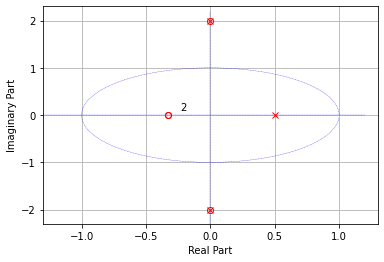

In [12]:
num   = np.array([1, 2.0/3, 37.0/9, 8.0/3, 4.0/9 ])# H(z') sistem fonksiyonunda z^n pay katsayıları 
denum = np.array([0, 1, -1.0/2, 4, -2])# H(z') sistem fonksiyonunda z^n payda katsayıları 
plt.figure()
zplane.zplane(num, denum)

### z = -2j ve z = 2j noktalarında kökler hem kutup hem sıfır olarak görülmektedir.

<StemContainer object of 3 artists>

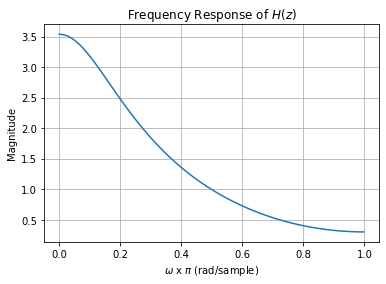

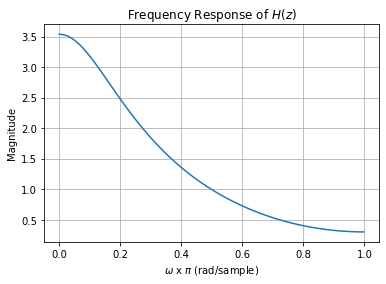

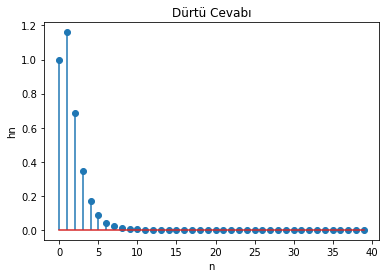

In [13]:
def dirac(n):
    if n == 0:
        return 1
    else:
        return 0

num   = np.array([1, 2/3, 37/9, 8/3, 4/9 ])
denum = np.array([0, 1, -1/2, 4, -2])   
zeros = np.array([-0.33, -0.33]) 
poles = np.array([0.5])
w, H = sgnl.freqz_zpk(zeros, poles, 1)
plt.plot(w/np.pi, abs(H)) 
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude'), plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()

num, denum = sgnl.zpk2tf(zeros, poles, 1) 
w1, H_tf = sgnl.freqz(num, denum)
plt.figure()
plt.plot(w1/np.pi, abs(H_tf)) 
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude'), plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()

n = np.arange(0, 40, 1) 
xn = np.zeros(len(n))
for i in range(len(n)):
    xn[i] = dirac(n[i])

yn = sgnl.lfilter(num, denum, xn)
plt.figure()
plt.xlabel('n')
plt.ylabel('hn')
plt.title('Dürtü Cevabı')
plt.stem(n, yn)

### Dürtü cevabına bakarak sistemin mutlak sonlu toplamlarının 0'a yakınsadığı gözlemlenir.
### Bu sebeple sistem kararlıdır.